In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


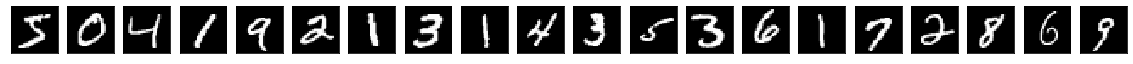

In [6]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

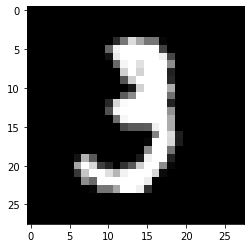

In [7]:
XX_train = x_train.astype('float32')/255.
XX_test = x_test.astype('float32')/255.
plt.imshow(XX_train[10].reshape(28,28))

In [8]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T

In [9]:
print(XX_train.shape)
print(Y_train.shape)
print(XX_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [10]:
def softmax(z):
    e_z = np.exp(z - np.max(z)) 
    return e_z / e_z.sum(axis=0, keepdims=True) 

In [11]:
def initialize_param(d):
    np.random.seed(1)
    w = np.random.randn(d,10)/np.sqrt(d)
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

In [12]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
    return A, cost

In [13]:
def backprop(X, Y, A):
    m = X.shape[1]
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    return dw, db

In [14]:
def optimize(params, X, Y, num_iterations, l_rate):
    w = params['w']
    b = params['b']
    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)
        params['w'] = params['w'] - l_rate*dw
        params['b'] = params['b'] - l_rate*db
        if i%100 == 0:
            print('Cost on {0} interation: {1} {2} {3}'.format(i, cost, np.linalg.norm(dw), db))
        costs.append(cost)
    return params, costs

In [15]:
def predict(params, X):
    w = params['w']
    print(w.shape, X.shape)
    b = params['b']
    m = X.shape[1]
    A = softmax(np.dot(w.T,X)+b)
    return A

In [16]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
        params = initialize_param(d)
        print(params["w"].shape,"pshape")
        params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
        Y_hat_train = predict(params,XX_train)
        Y_hat_test = predict(params,XX_test)

        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
        return params,costs

In [23]:
params,costs = model(XX_train.shape[0], XX_train, Y_train, XX_test, Y_test, 5000, 0.1)

(784, 10) pshape
Cost on 0 interation: 2.436488226563119 1.1366058666201924 -3.067176142697766e-17
Cost on 100 interation: 0.6140793499129976 0.14731918378778486 1.0658141036401504e-18
Cost on 200 interation: 0.49349119392433577 0.08265392383436176 2.220446049250313e-18
Cost on 300 interation: 0.4445869523096169 0.05938195955176011 -5.033011044967377e-19
Cost on 400 interation: 0.4166164790036122 0.047184301392954896 -5.921189464667502e-20
Cost on 500 interation: 0.3979535328842856 0.03958973920139576 5.921189464667502e-20
Cost on 600 interation: 0.38435610251548524 0.03436324055036924 1.1250259982868254e-18
Cost on 700 interation: 0.3738704917424687 0.030522324764162823 -5.625129991434127e-19
Cost on 800 interation: 0.36545786613044884 0.02756576511428196 3.434289889507151e-18
Cost on 900 interation: 0.3585087183718252 0.025210288904839704 -8.289665250534502e-19
Cost on 1000 interation: 0.35263878813410454 0.023283300103383205 -2.3684757858670007e-19
Cost on 1100 interation: 0.3475921

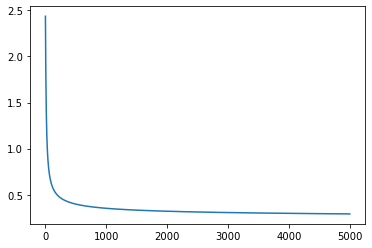

In [24]:
plt.plot(range(len(costs)),costs)